C:\Users\THANHTUNG\AppData\Local\Temp\ipykernel_13692\3690865639.py:45: MatplotlibDeprecationWarning: The dist attribute was deprecated in Matplotlib 3.6 and will be removed two minor releases later.
  ax.dist = 12  # distance from the plot


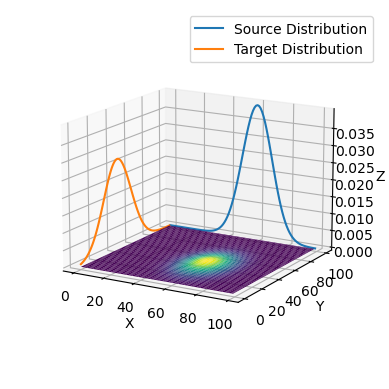

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from ot.datasets import make_1D_gauss as gauss

# Generate the data
n = 100  # number of bins

# Bin positions
x = np.arange(n, dtype=np.float64)

# Gaussian distributions
source_dist = gauss(n, m=60, s=10)  # m = mean, s = std
target_dist = gauss(n, m=40, s=15)

# Normalize the distributions
source_dist /= np.sum(source_dist)
target_dist /= np.sum(target_dist)

#joint distribution
joint_dist = source_dist[:,None] * target_dist[None,:]

# Create 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot source_dist on Oxz plane
ax.plot(x, 100*np.ones(n), source_dist, label='Source Distribution')

# Plot target_dist on Oyz plane
ax.plot(np.zeros(n), x, target_dist, label='Target Distribution')


# Meshgrid for the joint distribution
Y, X = np.meshgrid(x,x)
# Plot the surface for the joint distribution
ax.plot_surface(X, Y, joint_dist, cmap='viridis', edgecolor='none', alpha=1)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# Adjust viewing angle and distance for better visibility
ax.view_init(elev=15)  # elevation and azimuth angles
ax.dist = 12  # distance from the plot

plt.legend()
plt.show()